In [8]:
 #import important libraries
import numpy as np  # NumPy is used for numerical operations
import pandas as pd # Pandas is used for data manipulation and analysis
import xgboost as xgb  # XGBoost is a gradient boosting library for machine learning

from sklearn.decomposition import PCA  # PCA is used for dimensionality reduction
from imblearn.over_sampling import SMOTE # SMOTE is used for handling imbalanced datasets

from sklearn.preprocessing import StandardScaler, LabelEncoder # Import necessary libraries for data preprocessing
import matplotlib # plotting library
import seaborn as sns # Seaborn is a data visualization library 
import matplotlib.pyplot as plt # Matplotlib's pyplot module for creating plots
%matplotlib inline 
from scipy.stats import randint, uniform # Used for defining parameter distributions in hyperparameter tuning

from sklearn.model_selection import train_test_split,RandomizedSearchCV  # Train-test split and randomized hyperparameter search
# Import the mean_squared_error function from scikit-learn for evaluating regression model performance
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # Metrics for model evaluation
import xgboost as xgb # XGBoost for boosting algorithms
from xgboost import XGBClassifier # XGBoost Classifier for classification tasks

# Import models, including VotingClassifier meta-model

# performing hyperparameter tuning on a machine learning model. 
#Hyperparameters are parameters that are set before the training of a model
#and affect the behavior and performance of the model.
from sklearn.model_selection import GridSearchCV #GridSearchCV is a method that helps find the best hyperparameters for a machine learning model.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier #The VotingClassifier is an ensemble method that combines multiple individual classifiers to make predictions.
from sklearn.ensemble import RandomForestClassifier

#from sklearn.model_selection import cross_val_score 
# Set seed for reproducibility
SEED = 1


In [5]:
fn=r"E:\thesisdata\IDA_BTT.csv" # Specify the file path of the CSV file containing the data
df = pd.read_csv(fn, header=0) # Read the CSV file into a Pandas DataFrame
# The 'header=0' parameter indicates that the first row contains column names

In [6]:
df["Class"].value_counts()
# This helps you see how many instances belong to each class in the dataset

0    205
1     45
Name: Class, dtype: int64

In [6]:
#gender_counts = df['Gender'].value_counts()
#print(gender_counts)
#age_counts = df['Age'].value_counts()
#print(age_counts)

0    153
1     97
Name: Gender, dtype: int64
7.0     30
5.0     26
6.0     23
8.0     23
4.0     20
9.0     19
10.0    17
12.0    15
3.0     12
50.0     8
14.0     7
13.0     6
11.0     6
2.0      5
60.0     4
15.0     4
55.0     3
45.0     2
1.0      2
20.0     2
53.0     2
16.0     2
35.0     1
1.5      1
3.5      1
26.0     1
24.0     1
17.0     1
21.0     1
40.0     1
32.0     1
56.0     1
30.0     1
2.5      1
Name: Age, dtype: int64


In [7]:
df

,ID,pname,Age,Gender,CBC_MCV,CBC_MCH,CBC_RDW,CBC_HCT,CBC_MCHC,CBC_RBC,CBC_MPV,Platelets,Hb,Class
0,1,Laiba,7.0,1,54.00,19.20,47.3,18.30,35.7,3.40,7.1,267,6.5,1
1,2,Mudasir,5.0,0,77.00,28.50,18.5,20.32,37.1,2.65,9.3,222,7.5,0
2,3,Ayesha,7.0,1,72.00,25.50,17.2,16.44,35.3,2.28,8.7,275,5.8,0
3,4,Rizwan,3.0,0,72.00,27.50,19.3,12.33,38.3,1.72,10.2,298,4.7,0
4,5,Faizan,5.0,0,69.00,25.30,22.4,18.92,36.8,2.75,8.3,312,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Kaneez Fatima,7.0,1,98.30,20.24,25.1,17.78,36.3,3.52,8.0,44,3.3,0
246,247,Zahid,4.0,0,73.60,32.30,28.4,12.37,34.5,3.37,7.4,323,6.2,0
247,248,Samavia,4.0,1,78.38,29.30,28.3,12.42,36.3,3.21,9.8,110,5.1,0
248,249,Mujahid,6.0,0,63.96,27.30,24.6,18.66,33.0,4.40,8.2,240,5.2,0


In [9]:
#precrocessing the dataset
# Assuming your dataset is stored in a pandas DataFrame called 'df'
# and the target variable is in a column named 'Class'

#StandardScaler is for standardizing numerical features by scaling them,
#while LabelEncoder is for encoding categorical labels into numerical values.

# Encode the target variable
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Separate the features and target
X = df.drop(['pname','ID', 'Class'], axis=1)  # Features
y = df['Class']  # Encoded target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the shape of the scaled features and the encoded target
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)

Shape of X_scaled: (250, 11)
Shape of y: (250,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size= 0.3,random_state= SEED, stratify=df.Class)
#stratify ensures that each group or category in your data is represented proportionally in both the training and testing sets

In [54]:
#Basic Data
print("Decision Tree Classifier")
#DecisionTreeClassifier with specified hyperparameters
dt = DecisionTreeClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
# Train the Decision Tree model using the training set
dt.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

# Evaluate model performance using accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, dt_test_pred)

# Print the results
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, dt_test_pred))
print(confusion_matrix(y_test, dt_test_pred))

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the decision tree classifier
tree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

#Random Forest Classifier
print("Random Forest Classifier")
rf = RandomForestClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, rf_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, rf_test_pred))
print(confusion_matrix(y_test, rf_test_pred))

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the Random Forest classifier
forest = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

print("Gradient Boosting Machine Classifier")
gbm = GradientBoostingClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
gbm.fit(X_train, y_train)

y_train_pred = gbm.predict(X_train)
gbm_test_pred = gbm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, gbm_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, gbm_test_pred))
print(confusion_matrix(y_test, gbm_test_pred))

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the Gradient Boosting Machine classifier
gbm = GradientBoostingClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

print("XGBoost Classifier")
xgb_model = xgb.XGBClassifier(max_depth=5, n_estimators=100, random_state=SEED, min_samples_split=100)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
xg_test_pred = xgb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, xg_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, xg_test_pred))
print(confusion_matrix(y_test, xg_test_pred))

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2]
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

Decision Tree Classifier
Train accuracy: 0.9485714285714286
Test accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.86      0.92        14

    accuracy                           0.97        75
   macro avg       0.98      0.93      0.95        75
weighted avg       0.97      0.97      0.97        75

[[61  0]
 [ 2 12]]
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.9359999999999999
Random Forest Classifier
Train accuracy: 0.9485714285714286
Test accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.86      0.92        14

    accuracy                           0.97        75
   macro avg       0.98      0.93      0.95        75
weighted avg       0.97      0.97      0.97        75

[[6

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
# Initialize the models
dt_model = DecisionTreeClassifier(random_state=SEED)
rf_model = RandomForestClassifier(random_state=SEED)
gbm_model = GradientBoostingClassifier(random_state=SEED)
xgb_model = xgb.XGBClassifier(random_state=SEED)

# Train and evaluate each model using train-test split
models = [dt_model, rf_model, gbm_model, xgb_model]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
model_scores = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    model_scores[name] = accuracy

print("Model Scores using Train-Test Split:")
print(model_scores)

# Evaluate models using cross-validation
cv_scores = {}
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores[name] = np.mean(scores)

print("\nModel Scores using Cross-Validation:")
print(cv_scores)

# Find the best performing model based on cross-validation scores
best_model = max(cv_scores, key=cv_scores.get)
print("\nThe best performing model is:", best_model)

Model Scores using Train-Test Split:
{'Decision Tree': 0.88, 'Random Forest': 0.9733333333333334, 'Gradient Boosting': 0.9066666666666666, 'XGBoost': 0.8933333333333333}

Model Scores using Cross-Validation:
{'Decision Tree': 0.884, 'Random Forest': 0.952, 'Gradient Boosting': 0.932, 'XGBoost': 0.9359999999999999}

The best performing model is: Random Forest


In [56]:
#base data with SMOTE
print("Decision tree of Base Data with SMOTE")
smote = SMOTE(random_state=SEED)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create the decision tree classifier and fit it to the SMOTE-transformed train data
dt = DecisionTreeClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
dt.fit(X_train_smote, y_train_smote)

# Make predictions on the train and test data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate the accuracy for the train and test data separately
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the decision tree classifier
tree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

print("Random Forest Classifier")

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=SEED, max_depth=5, min_samples_split=50)

# Fit the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the Random Forest classifier
forest = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

print("Gradient Boosting Machine Classifier with Smote")

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the Gradient Boosting Machine classifier
gbm = GradientBoostingClassifier(max_depth=5, n_estimators=100, random_state=SEED, min_samples_split=100)

# Fit the model on the resampled training data
gbm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training and test sets
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the Gradient Boosting Machine classifier
gbm = GradientBoostingClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)


print("Extreme Gradient Boosting Classifier with SMOTE")

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=SEED, max_depth=5, min_child_weight=50)

# Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

#print(accuracy_score(y_test, dt_pred_class))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2]
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

Decision tree of Base Data with SMOTE
Train accuracy: 0.9428571428571428
Test accuracy: 0.92
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.75      0.86      0.80        14

    accuracy                           0.92        75
   macro avg       0.86      0.90      0.88        75
weighted avg       0.93      0.92      0.92        75

[[57  4]
 [ 2 12]]
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score: 0.9399999999999998
Random Forest Classifier
Train accuracy: 0.9714285714285714
Test accuracy: 0.9466666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        61
           1       0.86      0.86      0.86        14

    accuracy                           0.95        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.95      0.95      0.95        75

[[59

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Best score: 0.9440000000000002


In [60]:
pca = PCA()  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
dt.fit(X_train_pca, y_train)

y_train_pred = dt.predict(X_train_pca)
y_test_pred = dt.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Random Forest Classifier
rf = RandomForestClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
rf.fit(X_train_pca, y_train)

y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Random Forest Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Gradient Boosting Machine Classifier
gbm = GradientBoostingClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
gbm.fit(X_train_pca, y_train)

y_train_pred = gbm.predict(X_train_pca)
y_test_pred = gbm.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Gradient Boosting Machine Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# XGBoost Classifier
xgb = XGBClassifier(random_state=SEED, max_depth=5, min_child_weight=1, gamma=0)
xgb.fit(X_train_pca, y_train)

y_train_pred = xgb.predict(X_train_pca)
y_test_pred = xgb.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("XGBoost Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Decision Tree Classifier
Train accuracy: 0.9542857142857143
Test accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.86      0.92        14

    accuracy                           0.97        75
   macro avg       0.98      0.93      0.95        75
weighted avg       0.97      0.97      0.97        75

[[61  0]
 [ 2 12]]
Random Forest Classifier
Train accuracy: 0.9485714285714286
Test accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.86      0.92        14

    accuracy                           0.97        75
   macro avg       0.98      0.93      0.95        75
weighted avg       0.97      0.97      0.97        75

[[61  0]
 [ 2 12]]
Gradient Boosting Machine Classifier
Train accuracy: 1.0
Test accuracy: 0.9733333333333334
              precision    re

In [59]:
#PCA with SMOTE
pca = PCA()  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
dt.fit(X_train_resampled, y_train_resampled)

y_train_pred = dt.predict(X_train_pca)
y_test_pred = dt.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Random Forest Classifier
rf = RandomForestClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
rf.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Random Forest Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Gradient Boosting Machine Classifier
gbm = GradientBoostingClassifier(random_state=SEED, max_depth=5, min_samples_split=50)
gbm.fit(X_train_resampled, y_train_resampled)

y_train_pred = gbm.predict(X_train_pca)
y_test_pred = gbm.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Gradient Boosting Machine Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# XGBoost Classifier
xgb = XGBClassifier(random_state=SEED, max_depth=5, min_child_weight=1, gamma=0)
xgb.fit(X_train_resampled, y_train_resampled)

y_train_pred = xgb.predict(X_train_pca)
y_test_pred = xgb.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("XGBoost Classifier")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Decision Tree Classifier
Train accuracy: 0.9085714285714286
Test accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        61
           1       0.76      0.93      0.84        14

    accuracy                           0.93        75
   macro avg       0.87      0.93      0.90        75
weighted avg       0.94      0.93      0.94        75

[[57  4]
 [ 1 13]]
Random Forest Classifier
Train accuracy: 0.9542857142857143
Test accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.92      0.86      0.89        14

    accuracy                           0.96        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.96      0.96      0.96        75

[[60  1]
 [ 2 12]]
Gradient Boosting Machine Classifier
Train accuracy: 1.0
Test accuracy: 0.9333333333333333
              precision    recall  f1-score

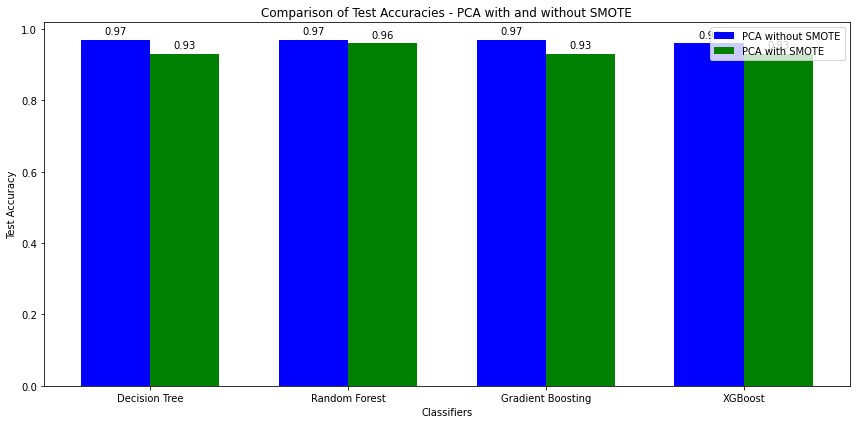

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


# Test accuracies for each scenario
classifiers = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
test_accuracies_pca_without_smote = [0.97, 0.97, 0.97,0.96]  # Replace with actual test accuracies without SMOTE
test_accuracies_pca_with_smote = [0.93, 0.96, 0.93, 0.93]  # Replace with actual test accuracies with SMOTE

# Set the bar width
bar_width = 0.35

# Set positions for the bars on the x-axis
bar_positions_pca_without_smote = np.arange(len(classifiers))
bar_positions_pca_with_smote = bar_positions_pca_without_smote + bar_width

# Create a bar graph for both scenarios
plt.figure(figsize=(12, 6))

# Bar graph for PCA without SMOTE
plt.bar(bar_positions_pca_without_smote, test_accuracies_pca_without_smote, width=bar_width, label='PCA without SMOTE', color='b')

# Bar graph for PCA with SMOTE
plt.bar(bar_positions_pca_with_smote, test_accuracies_pca_with_smote, width=bar_width, label='PCA with SMOTE', color='g')

# Set x-axis labels and tick positions
plt.xticks(bar_positions_pca_without_smote + bar_width / 2, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies - PCA with and without SMOTE')
plt.legend()

# Adding text labels on the bars
for i, v in enumerate(test_accuracies_pca_without_smote):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')

for i, v in enumerate(test_accuracies_pca_with_smote):
    plt.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')


plt.tight_layout()
plt.show()

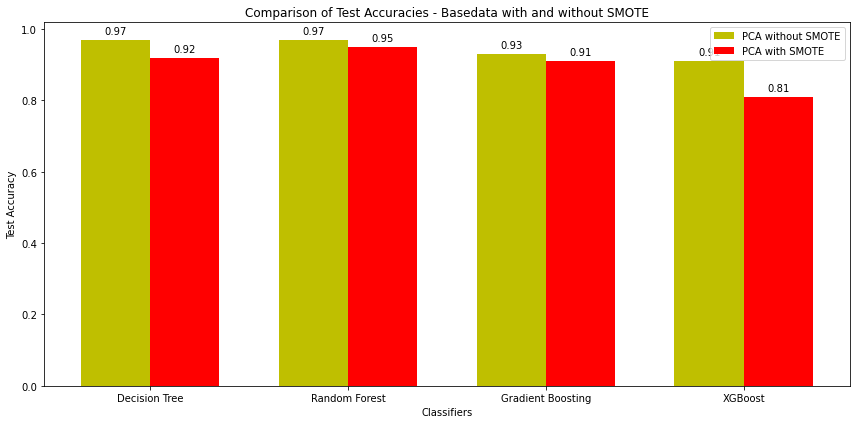

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


# Test accuracies for each scenario
classifiers = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
test_accuracies_without_smote = [0.97, 0.97, 0.93,0.91]  # Replace with actual test accuracies without SMOTE
test_accuracies_with_smote = [0.92, 0.95, 0.91, 0.81]  # Replace with actual test accuracies with SMOTE

# Set the bar width
bar_width = 0.35

# Set positions for the bars on the x-axis
bar_positions_without_smote = np.arange(len(classifiers))
bar_positions_with_smote = bar_positions_without_smote + bar_width

# Create a bar graph for both scenarios
plt.figure(figsize=(12, 6))

# Bar graph for PCA without SMOTE
plt.bar(bar_positions_without_smote, test_accuracies_without_smote, width=bar_width, label='PCA without SMOTE', color='y')

# Bar graph for PCA with SMOTE
plt.bar(bar_positions_with_smote, test_accuracies_with_smote, width=bar_width, label='PCA with SMOTE', color='r')

# Set x-axis labels and tick positions
plt.xticks(bar_positions_without_smote + bar_width / 2, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies - Basedata with and without SMOTE')
plt.legend()

# Adding text labels on the bars
for i, v in enumerate(test_accuracies_without_smote):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')

for i, v in enumerate(test_accuracies_with_smote):
    plt.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')


plt.tight_layout()
plt.show()

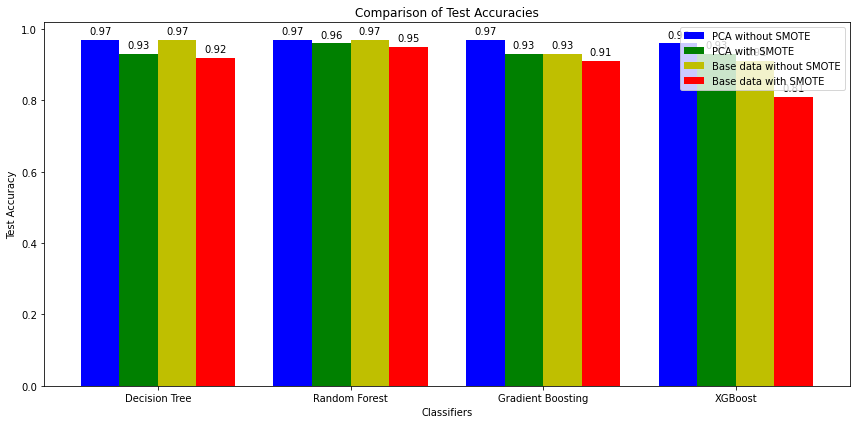

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Test accuracies for each scenario
classifiers = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]

# Test accuracies for PCA with and without SMOTE
test_accuracies_pca_without_smote = [0.97, 0.97, 0.97, 0.96]  
test_accuracies_pca_with_smote = [0.93, 0.96, 0.93, 0.93]  

# Test accuracies for base data with and without SMOTE
test_accuracies_without_smote = [0.97, 0.97, 0.93, 0.91]  
test_accuracies_with_smote = [0.92, 0.95, 0.91, 0.81]  

# Set the bar width
bar_width = 0.2

# Set positions for the bars on the x-axis
bar_positions = np.arange(len(classifiers))

# Create the bar graph
plt.figure(figsize=(12, 6))

# Bar graph for PCA without SMOTE
plt.bar(bar_positions - 1.5 * bar_width, test_accuracies_pca_without_smote, width=bar_width, label='PCA without SMOTE', color='b')

# Bar graph for PCA with SMOTE
plt.bar(bar_positions - 0.5 * bar_width, test_accuracies_pca_with_smote, width=bar_width, label='PCA with SMOTE', color='g')

# Bar graph for base data without SMOTE
plt.bar(bar_positions + 0.5 * bar_width, test_accuracies_without_smote, width=bar_width, label='Base data without SMOTE', color='y')

# Bar graph for base data with SMOTE
plt.bar(bar_positions + 1.5 * bar_width, test_accuracies_with_smote, width=bar_width, label='Base data with SMOTE', color='r')

# Set x-axis labels and tick positions
plt.xticks(bar_positions, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.legend()

# Adding text labels on the bars
for i, v in enumerate(test_accuracies_pca_without_smote):
    plt.text(i - 1.5 * bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')

for i, v in enumerate(test_accuracies_pca_with_smote):
    plt.text(i - 0.5 * bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')

for i, v in enumerate(test_accuracies_without_smote):
    plt.text(i + 0.5 * bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')

for i, v in enumerate(test_accuracies_with_smote):
    plt.text(i + 1.5 * bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

Estimated intrinsic dimension: 9


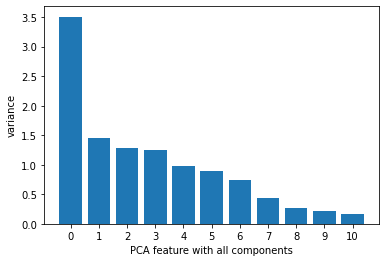

In [64]:
# Compute the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Identify the intrinsic dimension by looking at the "elbow" in the scree plot
elbow_idx = np.argmax(cumulative_var_ratio > 0.96) # set your own threshold
intrinsic_dim = elbow_idx + 1
print('Estimated intrinsic dimension:', intrinsic_dim)

# PCA features with all components.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature with all components')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
# Initialize the models
dt_model = DecisionTreeClassifier(random_state=SEED)
rf_model = RandomForestClassifier(random_state=SEED)
gbm_model = GradientBoostingClassifier(random_state=SEED)
#xgb_model = xgb.XGBClassifier(random_state=SEED)

# Train and evaluate each model using train-test split
models = [dt_model, rf_model, gbm_model, xgb_model]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
model_scores = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    model_scores[name] = accuracy

print("Model Scores using Train-Test Split:")
print(model_scores)

# Evaluate models using cross-validation
cv_scores = {}
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores[name] = np.mean(scores)

print("\nModel Scores using Cross-Validation:")
print(cv_scores)

# Find the best performing model based on cross-validation scores
best_model = max(cv_scores, key=cv_scores.get)
print("\nThe best performing model is:", best_model)

Model Scores using Train-Test Split:
{'Decision Tree': 0.88, 'Random Forest': 0.9733333333333334, 'Gradient Boosting': 0.9066666666666666, 'XGBoost': 0.8933333333333333}

Model Scores using Cross-Validation:
{'Decision Tree': 0.884, 'Random Forest': 0.952, 'Gradient Boosting': 0.932, 'XGBoost': 0.9359999999999999}

The best performing model is: Random Forest


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize a random forest classifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=SEED)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rules = []
for estimator in clf.estimators_:
    tree_rules = export_text(estimator)
    rules.append(tree_rules)

# Print the rules
for i, rule in enumerate(rules):
    print("Random Forest", i+1)
    print(rule)

Accuracy: 0.9733333333333334
Random Forest 1
|--- feature_7 <= 0.02
|   |--- feature_5 <= 1.00
|   |   |--- feature_0 <= 0.27
|   |   |   |--- feature_5 <= 0.03
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  0.03
|   |   |   |   |--- feature_3 <= -0.04
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_3 >  -0.04
|   |   |   |   |   |--- feature_7 <= -0.34
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_7 >  -0.34
|   |   |   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.27
|   |   |   |--- feature_4 <= -0.98
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  -0.98
|   |   |   |   |--- class: 0.0
|   |--- feature_5 >  1.00
|   |   |--- feature_5 <= 1.49
|   |   |   |--- class: 1.0
|   |   |--- feature_5 >  1.49
|   |   |   |--- class: 0.0
|--- feature_7 >  0.02
|   |--- feature_0 <= 0.27
|   |   |--- feature_6 <= 0.22
|   |   |   |--- feature_6 <= -0.10
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_6 

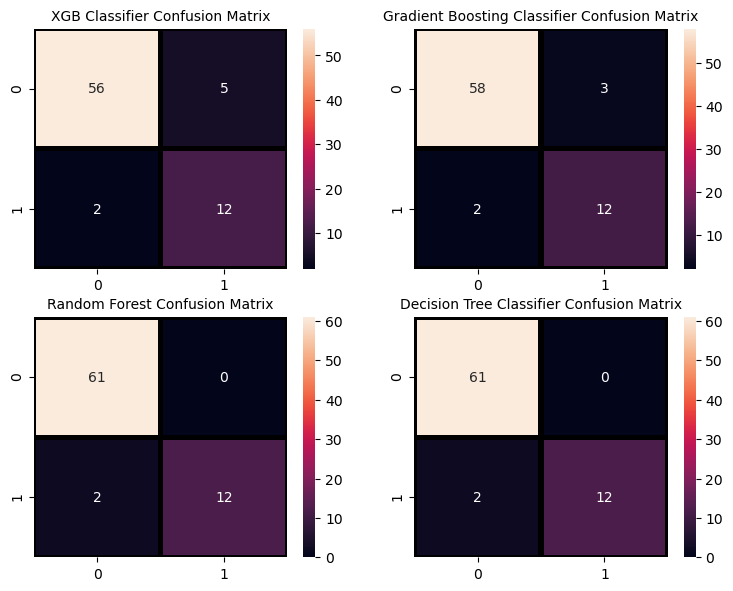

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Define 'xg_preds' and other required variables (assuming you have already trained the models and obtained predictions)
# xg_preds = ...
# gb_pred_class = ...
# rf_pred_class = ...
# ...

def plot_sub_sentiment(Airline, A):
    sns.heatmap(confusion_matrix(y_test, Airline), annot=True, fmt="d", linecolor="k", linewidths=3)
    plt.title(A + " Confusion Matrix", fontsize=10)

plt.figure(1, figsize=(9, 7), dpi=100)
plt.subplot(221)
plot_sub_sentiment(xg_test_pred, 'XGB Classifier')
plt.subplot(222)
plot_sub_sentiment(gbm_test_pred, 'Gradient Boosting Classifier')
# Uncomment and complete the other classifiers if needed
plt.subplot(223)
plot_sub_sentiment(rf_test_pred, 'Random Forest')
plt.subplot(224)
plot_sub_sentiment(dt_test_pred, 'Decision Tree Classifier')

plt.savefig('ConfusionOver.jpg')


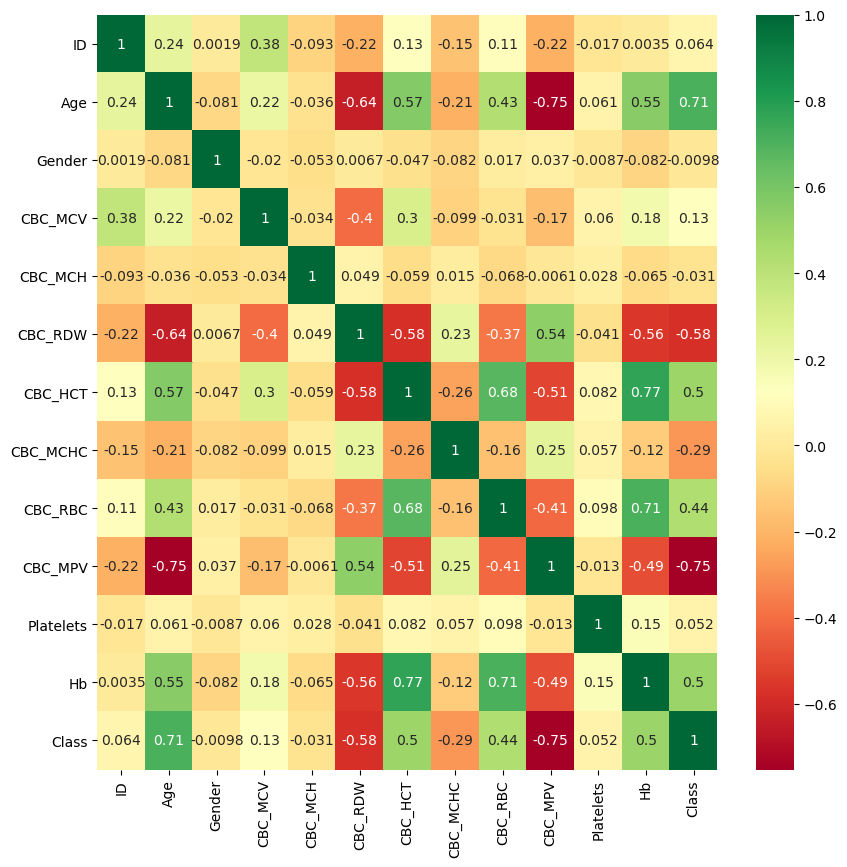

In [68]:
X = X_scaled  #independent featuers of dataset, variable is assigned to dff
y = y   #target column i.e price range , dependent variables
#get correlations of each features in dataset
corrmat = df.corr() #The corrmat variable is assigned to the correlation matrix of the entire dataset df
top_corr_features = corrmat.index #assigned to index of matrix
plt.figure(figsize=(10,10),dpi=100,)
#plt heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [69]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [92]:
from lime.lime_tabular import LimeTabularExplainer

# Define features and target
features = ['Age', 'Gender', 'CBC_MCV', 'CBC_MCH', 'CBC_RDW', 'CBC_HCT', 'CBC_MCHC', 'CBC_RBC', 'CBC_MPV', 'Platelets', 'Hb']
target_column_name = 'Class'  # Replace with the actual target column name

# Split the data into features (X) and target (y)
X = data[features]
y = data[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Train a complex model (replace with your model)
model = RandomForestClassifier(n_estimators=50, random_state=SEED)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Create an explainer
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train, mode="classification", feature_names=features)

# Select a data point for explanation (replace with your data)
data_point = X_test.iloc[0]

# Explain the model's prediction for the data point
explanation = explainer.explain_instance(data_point.values, model.predict_proba)

# Print the explanation (rules)
print("Explanation (Rules):")
explanation.show_in_notebook()


Model Accuracy: 0.9466666666666667
Explanation (Rules):


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
import pandas as pd

# Load your dataset
data = pd.read_csv(r"E:\thesisdata\IDA_BTT.csv")
columns_to_drop = ['ID', 'pname', 'Class']
data = data.drop(columns=columns_to_drop)

# Get the updated feature names
updated_feature_names = data.columns.tolist()

print(updated_feature_names)

['Age', 'Gender', 'CBC_MCV', 'CBC_MCH', 'CBC_RDW', 'CBC_HCT', 'CBC_MCHC', 'CBC_RBC', 'CBC_MPV', 'Platelets', 'Hb']


In [89]:
# Load your dataset
data = pd.read_csv(r"E:\thesisdata\IDA_BTT.csv")
# Print the column names to identify the target variable
print(data.columns)

# Replace 'Target_Column_Name' with the actual name of your target column
target_column_name = 'Class'

# Extract the target variable
target = data[target_column_name]

# Display the target variable
print(target)

Index(['ID', 'pname', 'Age', 'Gender', 'CBC_MCV', 'CBC_MCH', 'CBC_RDW',
       'CBC_HCT', 'CBC_MCHC', 'CBC_RBC', 'CBC_MPV', 'Platelets', 'Hb',
       'Class'],
      dtype='object')
0      1
1      0
2      0
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: Class, Length: 250, dtype: int64
